In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# PROGRAM WITH TENSORFLOW USING THE DATA OF THE DIFFERENT MATCHES OF THE THE LAST 4 SEASONS OF LA LIGA.
# THE PROGRAM CONVERTS THE GAMES INTO DUMMY VARIABLES AND USES TENSORFLOW
# VERY IMPORTANT: THE SCRIPT WAS DEVELOPED IN A TENSORFLOW ENVIRONMENT (FIRSTENV)
# OTHERWISE THERE WILL BE PROBLEMS WITH THE IMPORT OF TENSORFLOW AND ITS LIBRARIES.
# FOR A CORRECT IMPLEMENTATION OF A NEW ENVIRONMENT IN JUPYTER NOTEBOOK FOLLOW THESE INSTRUCTIONS:
# https://medium.com/@nrk25693/how-to-add-your-conda-environment-to-your-jupyter-notebook-in-just-4-steps-abeab8b8d084

In [2]:
#Info about the variables. Use this script to get the description of 1 variable

data_info = pd.read_csv('/home/miguel/Desktop/Archivos_Miguel/datos_liga/variables.csv',index_col='Variable')
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
    
feat_info('AC')


Away Team Corners


In [3]:
#We read the data, we add the column season and we place it in the first place
df_2019_2020 = pd.read_csv('/home/miguel/Desktop/Archivos_Miguel/datos_liga/2019-2020.csv')
df_2018_2019 = pd.read_csv('/home/miguel/Desktop/Archivos_Miguel/datos_liga/2018-2019.csv')
df_2017_2018 = pd.read_csv('/home/miguel/Desktop/Archivos_Miguel/datos_liga/2017-2018.csv')
df_2016_2017 = pd.read_csv('/home/miguel/Desktop/Archivos_Miguel/datos_liga/2016-2017.csv')

df_2019_2020['Season'] = df_2019_2020.apply(lambda x: '2019-2020', axis=1)
df_2018_2019['Season'] = df_2018_2019.apply(lambda x: '2018-2019', axis=1)
df_2017_2018['Season'] = df_2017_2018.apply(lambda x: '2017-2018', axis=1)
df_2016_2017['Season'] = df_2016_2017.apply(lambda x: '2016-2017', axis=1)


In [4]:
# We put the first 'Season in the first place'

cols_2019_2020 = df_2019_2020.columns.tolist()
cols_2019_2020 = cols_2019_2020[-1:] + cols_2019_2020[:-1]
df_2019_2020 = df_2019_2020[cols_2019_2020]

cols_2018_2019 = df_2018_2019.columns.tolist()
cols_2018_2019 = cols_2018_2019[-1:] + cols_2018_2019[:-1]
df_2018_2019 = df_2018_2019[cols_2018_2019]

cols_2017_2018 = df_2017_2018.columns.tolist()
cols_2017_2018 = cols_2017_2018[-1:] + cols_2017_2018[:-1]
df_2017_2018 = df_2017_2018[cols_2017_2018]

cols_2016_2017 = df_2016_2017.columns.tolist()
cols_2016_2017 = cols_2016_2017[-1:] + cols_2016_2017[:-1]
df_2016_2017 = df_2016_2017[cols_2016_2017]


In [5]:
# We link all the files from all the seasons and drop Time 

df = pd.concat([df_2019_2020, df_2018_2019, df_2017_2018, df_2016_2017],sort=False)

df=df.drop(axis=1,columns='Time')

In [6]:
#We create the matrix with null values. Seasons must stay

df_nulls= df.isnull()
df_nulls['Season']=df['Season']

In [7]:
#We visualize the porcentage of null data for the different variables

null_data = 100 * df.isnull().sum()/len(df)
pd.set_option('display.max_rows',None)
null_data


Season        0.000000
Div           0.000000
Date          0.000000
HomeTeam      0.000000
AwayTeam      0.000000
FTHG          0.000000
FTAG          0.000000
FTR           0.000000
HTHG          0.000000
HTAG          0.000000
HTR           0.000000
HS            0.000000
AS            0.000000
HST           0.000000
AST           0.000000
HF            0.000000
AF            0.000000
HC            0.000000
AC            0.000000
HY            0.000000
AY            0.000000
HR            0.000000
AR            0.000000
B365H         0.000000
B365D         0.000000
B365A         0.000000
BWH           0.000000
BWD           0.000000
BWA           0.000000
IWH           0.212766
IWD           0.212766
IWA           0.212766
PSH           0.000000
PSD           0.000000
PSA           0.000000
WHH           0.000000
WHD           0.000000
WHA           0.000000
VCH           0.000000
VCD           0.000000
VCA           0.000000
MaxH         80.851064
MaxD         80.851064
MaxA       

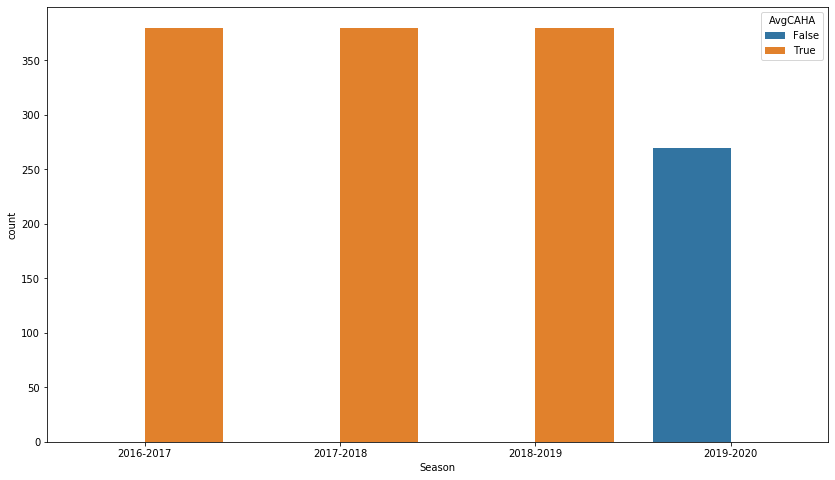

In [8]:
#With this system we can visualize, to which season belongs the null data

plt.figure(figsize=(14,8))
order_years = ['2016-2017','2017-2018','2018-2019','2019-2020']

sns.countplot(x='Season',data=df_nulls,hue='AvgCAHA',order=order_years)

In [9]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 379
Columns: 126 entries, Season to LBA
dtypes: float64(103), int64(16), object(7)
memory usage: 1.4+ MB


In [10]:
list(df.columns)

['Season',
 'Div',
 'Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HTR',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',
 'MaxH',
 'MaxD',
 'MaxA',
 'AvgH',
 'AvgD',
 'AvgA',
 'B365>2.5',
 'B365<2.5',
 'P>2.5',
 'P<2.5',
 'Max>2.5',
 'Max<2.5',
 'Avg>2.5',
 'Avg<2.5',
 'AHh',
 'B365AHH',
 'B365AHA',
 'PAHH',
 'PAHA',
 'MaxAHH',
 'MaxAHA',
 'AvgAHH',
 'AvgAHA',
 'B365CH',
 'B365CD',
 'B365CA',
 'BWCH',
 'BWCD',
 'BWCA',
 'IWCH',
 'IWCD',
 'IWCA',
 'PSCH',
 'PSCD',
 'PSCA',
 'WHCH',
 'WHCD',
 'WHCA',
 'VCCH',
 'VCCD',
 'VCCA',
 'MaxCH',
 'MaxCD',
 'MaxCA',
 'AvgCH',
 'AvgCD',
 'AvgCA',
 'B365C>2.5',
 'B365C<2.5',
 'PC>2.5',
 'PC<2.5',
 'MaxC>2.5',
 'MaxC<2.5',
 'AvgC>2.5',
 'AvgC<2.5',
 'AHCh',
 'B365CAHH',
 'B365CAHA',
 'PCAHH',
 'PCAHA',
 'MaxCAHH',
 'MaxCAHA',
 'AvgCA

In [11]:
df.head()

,Season,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA
0,2019-2020,SP1,16/08/2019,Ath Bilbao,Barcelona,1,0,H,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-2020,SP1,17/08/2019,Celta,Real Madrid,1,3,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-2020,SP1,17/08/2019,Valencia,Sociedad,1,1,D,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-2020,SP1,17/08/2019,Mallorca,Eibar,2,1,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-2020,SP1,17/08/2019,Leganes,Osasuna,0,1,A,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['FTR']

0      H
1      A
2      D
3      H
4      A
5      D
6      H
7      A
8      A
9      H
10     A
11     H
12     D
13     D
14     H
15     D
16     D
17     A
18     A
19     H
20     D
21     H
22     D
23     D
24     H
25     H
26     H
27     H
28     A
29     D
30     D
31     H
32     A
33     H
34     H
35     A
36     A
37     A
38     D
39     D
40     D
41     H
42     D
43     D
44     H
45     H
46     A
47     D
48     H
49     A
50     D
51     H
52     H
53     D
54     A
55     D
56     H
57     H
58     D
59     H
60     H
61     A
62     A
63     H
64     D
65     A
66     H
67     H
68     D
69     H
70     D
71     A
72     H
73     H
74     H
75     H
76     H
77     D
78     A
79     H
80     H
81     A
82     D
83     H
84     H
85     H
86     H
87     A
88     D
89     H
90     H
91     H
92     H
93     H
94     A
95     H
96     A
97     H
98     H
99     D
100    H
101    A
102    D
103    H
104    H
105    H
106    H
107    D
108    H
109    A
110    H
1

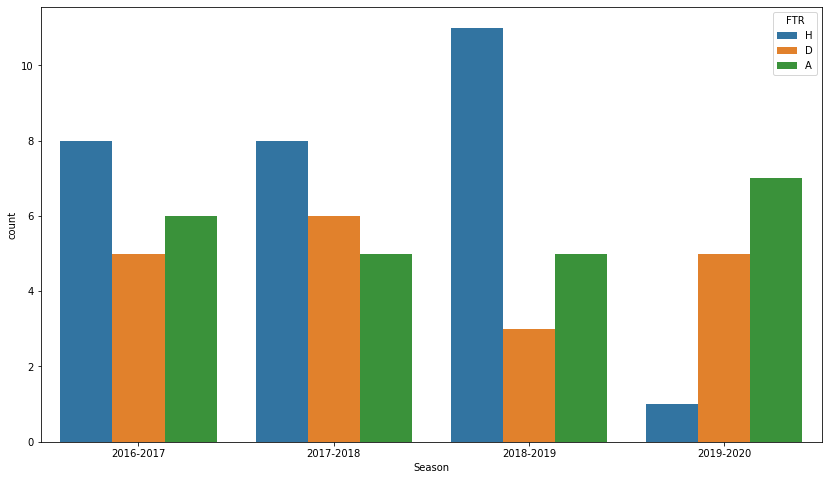

In [13]:
#Script for visualizing HomeWin-Draw-AwayWin for a concrete team:

plt.figure(figsize=(14,8))

Equipo_casa = df[(df['HomeTeam']=='Espanol')]

order_H_D_A = ['H','D','A']

sns.countplot(x='Season',data=Equipo_casa,hue='FTR',order=order_years,hue_order=order_H_D_A)


In [14]:
df['HomeTeam']

0       Ath Bilbao
1            Celta
2         Valencia
3         Mallorca
4          Leganes
5       Villarreal
6           Alaves
7          Espanol
8            Betis
9       Ath Madrid
10         Granada
11         Levante
12         Osasuna
13     Real Madrid
14           Celta
15          Getafe
16          Alaves
17        Mallorca
18         Leganes
19       Barcelona
20         Sevilla
21      Ath Bilbao
22         Osasuna
23          Getafe
24         Levante
25           Betis
26        Valencia
27      Ath Madrid
28         Espanol
29      Villarreal
30        Mallorca
31     Real Madrid
32         Leganes
33        Sociedad
34       Barcelona
35           Eibar
36          Alaves
37           Celta
38      Valladolid
39           Betis
40         Osasuna
41      Villarreal
42         Levante
43      Ath Madrid
44         Granada
45          Getafe
46         Espanol
47        Valencia
48      Ath Bilbao
49         Sevilla
50      Valladolid
51           Betis
52       Bar

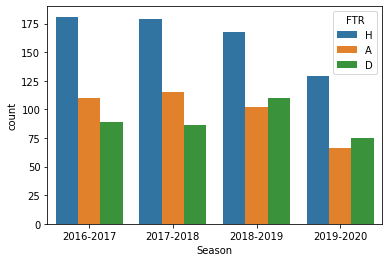

In [15]:
#Script for visualization of general statistics of HomeWin-Draw-AwayWin


sns.countplot(x='Season',data=df,hue='FTR',order=order_years)

In [16]:
# We keep only the interesting columns:

df_main = df[['HomeTeam', 'AwayTeam','FTHG','FTAG','HC','AC','HF','AF','HY','AY','HR','AR']]

In [17]:
#CONVERT THE TEAMS INTO DUMMIES (THIS WILL BE THE INPUT MATRIX IN OUR NN)

df_dummies = pd.get_dummies(df_main)

cols_main = df_dummies.columns.tolist()

cols_main = cols_main[-54:] + cols_main[:-54]

df_dummies = df_dummies[cols_main]

In [18]:
list(df_dummies.columns)

['HomeTeam_Alaves',
 'HomeTeam_Ath Bilbao',
 'HomeTeam_Ath Madrid',
 'HomeTeam_Barcelona',
 'HomeTeam_Betis',
 'HomeTeam_Celta',
 'HomeTeam_Eibar',
 'HomeTeam_Espanol',
 'HomeTeam_Getafe',
 'HomeTeam_Girona',
 'HomeTeam_Granada',
 'HomeTeam_Huesca',
 'HomeTeam_La Coruna',
 'HomeTeam_Las Palmas',
 'HomeTeam_Leganes',
 'HomeTeam_Levante',
 'HomeTeam_Malaga',
 'HomeTeam_Mallorca',
 'HomeTeam_Osasuna',
 'HomeTeam_Real Madrid',
 'HomeTeam_Sevilla',
 'HomeTeam_Sociedad',
 'HomeTeam_Sp Gijon',
 'HomeTeam_Valencia',
 'HomeTeam_Valladolid',
 'HomeTeam_Vallecano',
 'HomeTeam_Villarreal',
 'AwayTeam_Alaves',
 'AwayTeam_Ath Bilbao',
 'AwayTeam_Ath Madrid',
 'AwayTeam_Barcelona',
 'AwayTeam_Betis',
 'AwayTeam_Celta',
 'AwayTeam_Eibar',
 'AwayTeam_Espanol',
 'AwayTeam_Getafe',
 'AwayTeam_Girona',
 'AwayTeam_Granada',
 'AwayTeam_Huesca',
 'AwayTeam_La Coruna',
 'AwayTeam_Las Palmas',
 'AwayTeam_Leganes',
 'AwayTeam_Levante',
 'AwayTeam_Malaga',
 'AwayTeam_Mallorca',
 'AwayTeam_Osasuna',
 'AwayTeam_Re

In [19]:
df_dummies.mean()

HomeTeam_Alaves          0.050355
HomeTeam_Ath Bilbao      0.049645
HomeTeam_Ath Madrid      0.050355
HomeTeam_Barcelona       0.050355
HomeTeam_Betis           0.050355
HomeTeam_Celta           0.049645
HomeTeam_Eibar           0.050355
HomeTeam_Espanol         0.049645
HomeTeam_Getafe          0.036879
HomeTeam_Girona          0.026950
HomeTeam_Granada         0.022695
HomeTeam_Huesca          0.013475
HomeTeam_La Coruna       0.026950
HomeTeam_Las Palmas      0.026950
HomeTeam_Leganes         0.050355
HomeTeam_Levante         0.036170
HomeTeam_Malaga          0.026950
HomeTeam_Mallorca        0.009929
HomeTeam_Osasuna         0.023404
HomeTeam_Real Madrid     0.049645
HomeTeam_Sevilla         0.049645
HomeTeam_Sociedad        0.049645
HomeTeam_Sp Gijon        0.013475
HomeTeam_Valencia        0.050355
HomeTeam_Valladolid      0.022695
HomeTeam_Vallecano       0.013475
HomeTeam_Villarreal      0.049645
AwayTeam_Alaves          0.049645
AwayTeam_Ath Bilbao      0.050355
AwayTeam_Ath M

In [20]:
# WE START WITH THE NN (TRAINING)

from sklearn.model_selection import train_test_split

In [42]:
# WE WILL TRY TO PREDICT THE VARIABLE FTHG (Full Time Home Team Goals)
# THE IDEA IS TO USE A POISSON DISTRIBUTION TO CALCULATE THE PROBABILITIES:
# https://www.betfair.com.au/hub/poisson-distribution

X = df_dummies.drop(['FTHG','FTAG','HC','AC','HF','AF','HY','AY','HR','AR'],axis=1).values
y = df_dummies['FTHG'].values

In [43]:
feat_info('FTHG')

Full Time Home Team Goals


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
import tensorflow as tf

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss = 'mse')

In [48]:
model.fit(x=X_train,y=y_train,epochs=150)

Train on 987 samples
Epoch 1/150
987/987 [==============================] - 1s 1ms/sample - loss: 3.8170
Epoch 2/150
987/987 [==============================] - 0s 138us/sample - loss: 3.2768
Epoch 3/150
987/987 [==============================] - 0s 144us/sample - loss: 2.6902
Epoch 4/150
987/987 [==============================] - 0s 122us/sample - loss: 2.1510
Epoch 5/150
987/987 [==============================] - 0s 136us/sample - loss: 1.7841
Epoch 6/150
987/987 [==============================] - 0s 141us/sample - loss: 1.6460
Epoch 7/150
987/987 [==============================] - 0s 118us/sample - loss: 1.5907
Epoch 8/150
987/987 [==============================] - 0s 143us/sample - loss: 1.5511
Epoch 9/150
987/987 [==============================] - 0s 119us/sample - loss: 1.5167
Epoch 10/150
987/987 [==============================] - 0s 138us/sample - loss: 1.4806
Epoch 11/150
987/987 [==============================] - 0s 132us/sample - loss: 1.4509
Epoch 12/150
987/987 [===========

987/987 [==============================] - 0s 134us/sample - loss: 0.9595
Epoch 96/150
987/987 [==============================] - 0s 127us/sample - loss: 0.9554
Epoch 97/150
987/987 [==============================] - 0s 131us/sample - loss: 0.9543
Epoch 98/150
987/987 [==============================] - 0s 96us/sample - loss: 0.9508
Epoch 99/150
987/987 [==============================] - 0s 131us/sample - loss: 0.9456
Epoch 100/150
987/987 [==============================] - 0s 124us/sample - loss: 0.9445
Epoch 101/150
987/987 [==============================] - 0s 123us/sample - loss: 0.9388
Epoch 102/150
987/987 [==============================] - 0s 130us/sample - loss: 0.9390
Epoch 103/150
987/987 [==============================] - 0s 127us/sample - loss: 0.9353
Epoch 104/150
987/987 [==============================] - 0s 122us/sample - loss: 0.9329
Epoch 105/150
987/987 [==============================] - 0s 120us/sample - loss: 0.9267
Epoch 106/150
987/987 [============================

In [49]:
loss_df=pd.DataFrame(model.history.history)

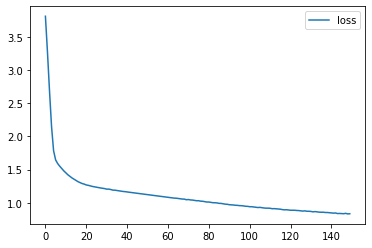

In [50]:
loss_df.plot()

In [51]:
y_test

array([0, 0, 0, 1, 1, 3, 1, 1, 4, 1, 1, 0, 0, 4, 0, 5, 0, 1, 2, 3, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 2, 0, 1, 4, 3, 4, 3,
       1, 0, 5, 0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 4, 0, 0, 4, 0, 0, 4,
       1, 2, 2, 1, 2, 4, 1, 3, 1, 0, 1, 2, 1, 0, 2, 2, 1, 3, 0, 0, 1, 1,
       3, 0, 4, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 3, 2,
       2, 0, 2, 2, 4, 2, 0, 0, 4, 1, 0, 2, 0, 0, 1, 1, 0, 1, 3, 2, 0, 3,
       1, 1, 1, 1, 2, 0, 1, 4, 2, 3, 4, 5, 1, 3, 3, 4, 1, 1, 0, 3, 0, 1,
       2, 1, 0, 2, 4, 4, 1, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0, 3, 0, 6, 5, 1,
       2, 2, 1, 3, 1, 4, 0, 1, 3, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       6, 4, 1, 3, 2, 0, 0, 0, 4, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 5, 3, 2,
       3, 0, 2, 1, 2, 3, 0, 4, 2, 0, 1, 1, 1, 2, 1, 3, 0, 0, 1, 0, 5, 2,
       1, 3, 2, 0, 1, 1, 2, 1, 2, 1, 3, 5, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       3, 0, 1, 1, 0, 0, 1, 1, 4, 0, 1, 0, 1, 1, 0, 6, 1, 3, 5, 5, 1, 2,
       3, 0, 1, 1, 3, 3, 2, 3, 1, 2, 2, 4, 0, 1, 0,

In [52]:
#WE EVALUATE THE RESULTS, WHICH MEANS, WE COMPARE THE REAL TESTS AND THE PREDICTIONS

#Column with real tests:

pred_df = pd.DataFrame(y_test,columns=['Test true y'])

In [53]:
# Column with the predictions of the neural network: we execute predict and we convert it into an array 
# in order to compare it with pred_df

test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(423,))


In [54]:
len(test_predictions)

423

In [55]:
len(pred_df)

423

In [56]:
pred_df_total = pd.concat([pred_df,test_predictions],axis=1)


In [57]:
pred_df_total.columns = ['Test true y','Predicted y']

pred_df_total

,Test true y,Predicted y
0,0,0.565198
1,0,2.021903
2,0,0.994448
3,1,0.088931
4,1,3.714126
5,3,0.542593
6,1,0.013467
7,1,1.481669
8,4,2.175651
9,1,1.502985


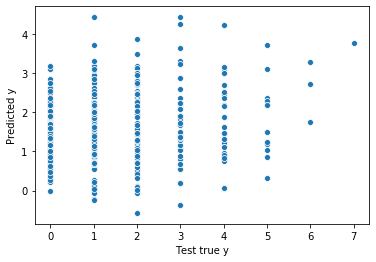

In [58]:
sns.scatterplot(x='Test true y',y='Predicted y',data=pred_df_total)

# The results are obvioulsly not accurate, probably due to the small size of the input data file, anyway
# the goal was to use the keras - tensorflow model prediction.